### Олескевич Софія
### Лабораторна робота №1 Варіант 4
### Медіанна фільтрація зображень

In [66]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#### Початкові зображення

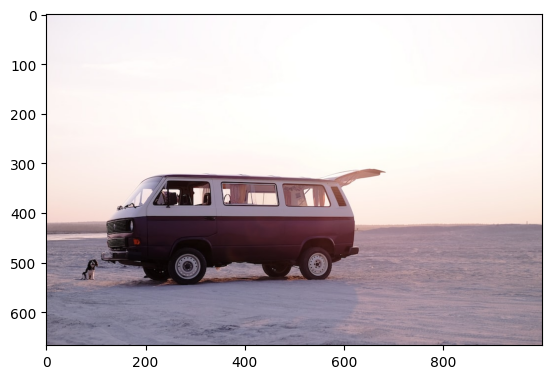

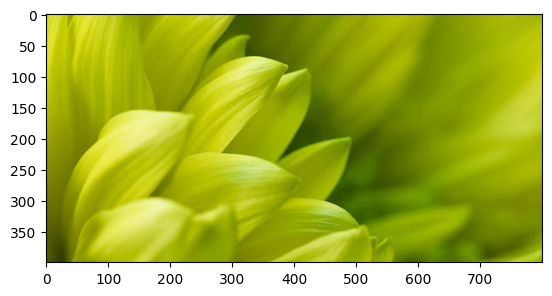

In [67]:
import os

def to_greyscale(image):
  return np.dot(image[...,:3], [0.299, 0.587, 0.114])

folder_dir = "images"

for image in os.listdir(folder_dir):
    img = plt.imread(folder_dir + '/'+ image)
    plt.figure()
    plt.imshow(img)

#### Чорно-білі

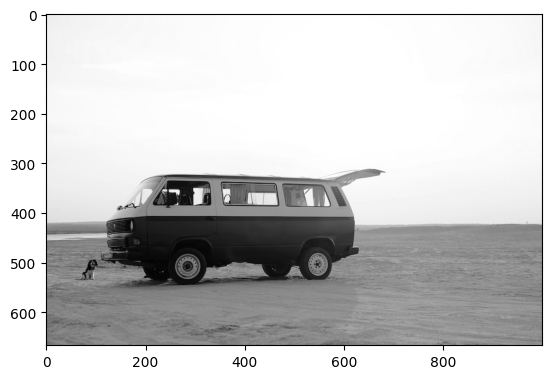

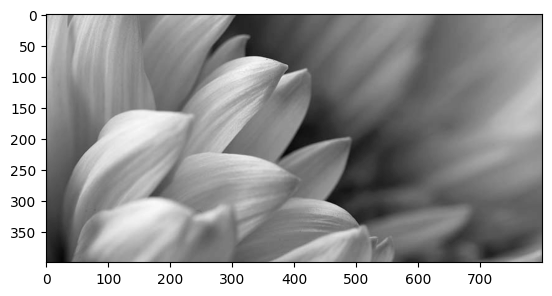

In [68]:
img = plt.imread('images/car.jpg')
img2 = plt.imread('images/home.jpg')
lst = [img, img2]

grey_lst = []
for im in lst:
    gray_img = to_greyscale(im)
    grey_lst.append(gray_img)
    plt.figure()
    plt.imshow(gray_img, cmap="gray")

#### Додаю шум до зображення


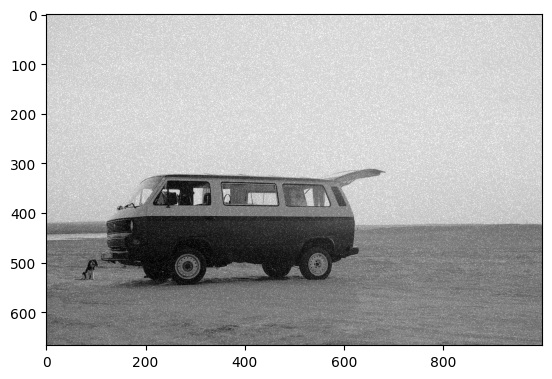

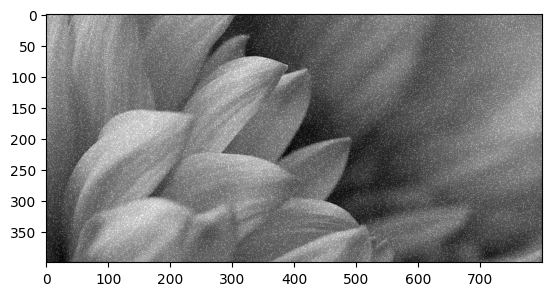

In [69]:
noisy_lst = []

for grey_im, im in zip(grey_lst, lst):
    noise = np.random.normal(0,1, grey_im.shape)
    noise = noise.reshape(im.shape[0], im.shape[1]).astype('uint8')
    noisy_img = grey_im + 0.2*noise
    noisy_lst.append(noisy_img)
    plt.figure()
    plt.imshow(noisy_img, cmap="gray")

#### Створюю функцію медіанної фільтрації

In [70]:
def median_filter(img, size):
  temp = []
  indx = size // 2
  data_final = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for z in range(size):
        if i + z - indx < 0 or i + z - indx > len(img) - 1:
          for c in range(size):
            temp.append(0)
        else:
          if j + z - indx < 0 or j + indx > len(img[0]) - 1:
            temp.append(0)
          else:
            for k in range(size):
              temp.append(img[i + z - indx][j + k - indx])

      temp.sort()
      data_final[i][j] = temp[len(temp) // 2]
      temp = []
  return data_final

### Розмір матриці фільтру - **3**

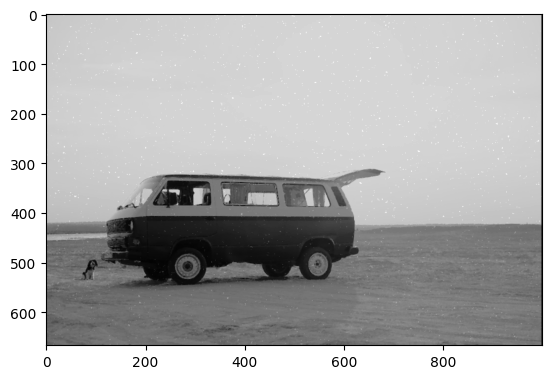

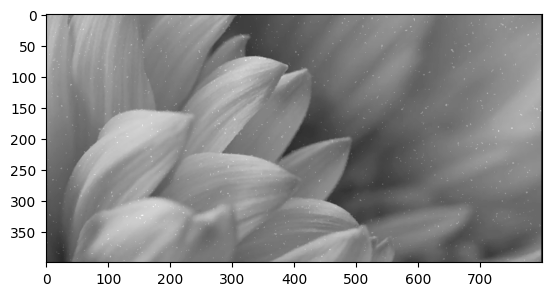

In [71]:
for noisy_im in noisy_lst:
    filtered_img_3 = median_filter(noisy_im, 3)
    plt.figure()
    plt.imshow(filtered_img_3, cmap="gray")

### Розмір матриці фільтру - **5**

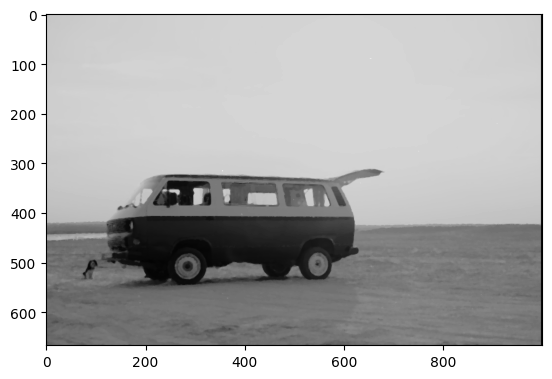

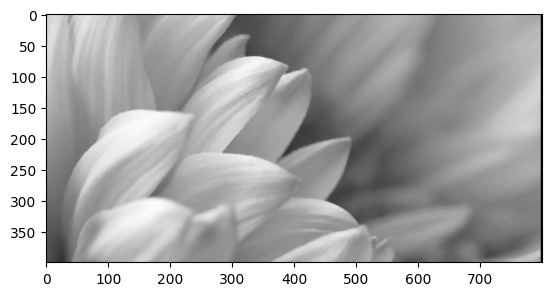

In [72]:
for noisy_im in noisy_lst:
    filtered_img_5 = median_filter(noisy_im, 5)
    plt.figure()
    plt.imshow(filtered_img_5, cmap="gray")

### Розмір матриці фільтру - **7**

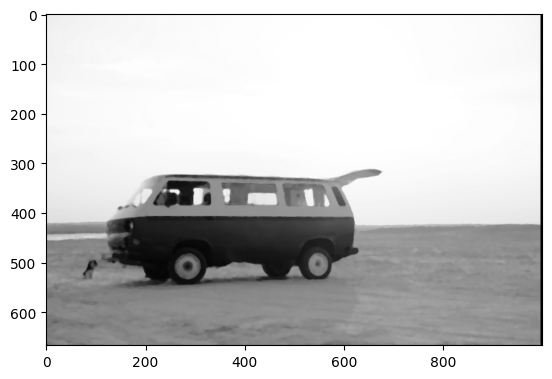

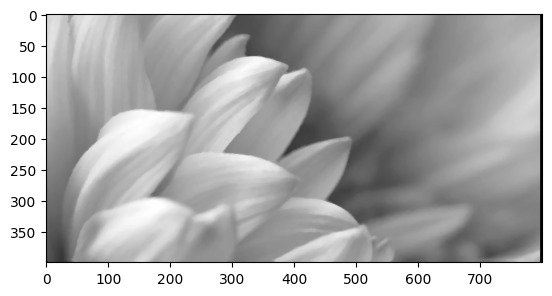

In [73]:
for noisy_im in noisy_lst:
    filtered_img_7 = median_filter(noisy_im, 7)
    plt.figure()
    plt.imshow(filtered_img_7, cmap="gray")

### Done